In [1]:
#import libraries
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
np.random.seed = 29

In [2]:
#create environment for Frozen Lake
env = gym.make("FrozenLake-v0")

In [3]:
# Directions --->  0: LEFT, 1: DOWN, 2: RIGHT, 3: UP
# https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py

direction = {0:'LEFT', 1:'DOWN', 2:'RIGHT', 3:'UP'}

In [4]:
# Initialize the q-table to all zeros
num_actions = env.action_space.n
num_states = env.observation_space.n
q_table = np.zeros((num_states, num_actions))

# Q-table update parameters
alpha = 0.8
gamma = 0.95

# Exploration parameters
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

## Random Walk

In [5]:
n, max_steps = 10000, 100
total_reward = 0
num_steps = []
for episode in range(n):
    observation = env.reset()
    for i in range(max_steps):
        observation, reward, done, info = env.step(env.action_space.sample())
        if done: 
            total_reward += reward
            num_steps.append(i+1)
            break
env.close()
print('Success Percentage = {0:.2f} %'.format(100*total_reward/n))
print('Average number of steps taken to reach the goal = {0:.2f}'.format(np.mean(num_steps)))

Success Percentage = 1.29 %
Average number of steps taken to reach the goal = 7.71


## Training Q-Table with Slippery Conditions

In [17]:
#Training Q Table
rewards = []
epsilon = max_epsilon
n, max_steps = 25000, 100
print("Training started")
for episode in range(n):
    s = env.reset()
    total_reward = 0
    for i in range(max_steps):
        if random.uniform(0, 1) < epsilon:
            a = env.action_space.sample()
        else:
            a = np.argmax(q_table[s, :])
        
        s_new, r, done, info = env.step(a)
        # Updating the Q Table using formula(for Slippery Conditions): 
        # Q(s,a) = Q(s,a) + alpha(r + gamma*max(Q(s’,a’) - Q(s,a))
        q_table[s, a] = q_table[s, a] + alpha*(r + gamma*np.max(q_table[s_new, :]) - q_table[s, a])
        s, total_reward = s_new, total_reward+r
        if done: 
            rewards.append(total_reward)
            epsilon = min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decay_rate*episode)
            break
env.close()
print("Training done")

Training started
Training done


In [18]:
# Q-Table
with np.printoptions(precision=5, suppress=True):
    print(q_table)

[[0.10361 0.07279 0.0771  0.09632]
 [0.02059 0.01125 0.00624 0.09839]
 [0.10324 0.0109  0.00556 0.018  ]
 [0.0049  0.      0.00445 0.01804]
 [0.10097 0.01792 0.02199 0.00516]
 [0.      0.      0.      0.     ]
 [0.00004 0.00001 0.61873 0.     ]
 [0.      0.      0.      0.     ]
 [0.00163 0.07453 0.02027 0.0756 ]
 [0.00066 0.6635  0.01187 0.02279]
 [0.91629 0.00104 0.00082 0.0056 ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.01721 0.02693 0.68318 0.06515]
 [0.20537 0.99981 0.18711 0.22484]
 [0.      0.      0.      0.     ]]


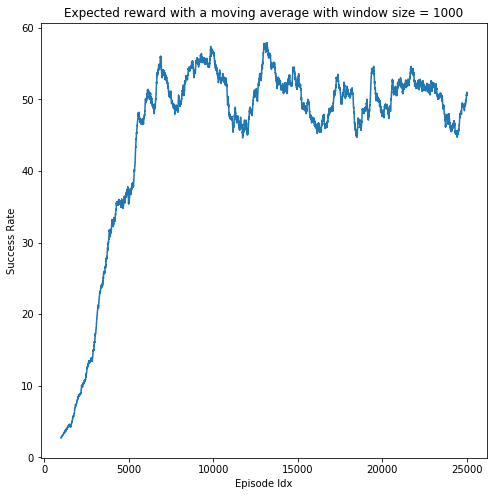

In [19]:
# Reward over time graph
moving_avg_reward = []
window = 1000
for i in range(window, n):
    moving_avg_reward.append(100*sum(rewards[i-window:i])/window)

fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(range(window, n), moving_avg_reward)
axes.set(xlabel='Episode Idx', ylabel='Success Rate', title='Expected reward with a moving average with window size = {}'.format(window))
plt.show()

In [20]:
# Print the action the agent takes at each state as per Q Table
print(np.array([direction[x] for x in np.argmax(q_table, axis=1)]).reshape(4, 4))

[['LEFT' 'UP' 'LEFT' 'UP']
 ['LEFT' 'LEFT' 'RIGHT' 'LEFT']
 ['UP' 'DOWN' 'LEFT' 'LEFT']
 ['LEFT' 'RIGHT' 'DOWN' 'LEFT']]


In [21]:
#Testing

n, max_steps = 10000, 100
count, num_prints = 0, 1
rewards = []
num_steps = []
for episode in range(n):
    s = env.reset()
    total_reward = 0
    if count<num_prints:
        print('---------EPISODE {}---------'.format(episode))
        env.render()
    for i in range(max_steps):
        a = np.argmax(q_table[s, :])
        s, r, done, info = env.step(a)
        total_reward+=r
        if count<num_prints:
            env.render()
        if done: 
            rewards.append(total_reward)
            num_steps.append(i+1)
            if count<num_prints: 
                if r==1:
                    print('SUCCESS!!!')
                else:
                    print('Failed :( )')
            count+=1
            break
env.close()


---------EPISODE 0---------

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HF

In [22]:
print('Success Percentage = {0:.2f} %'.format(100*np.sum(rewards)/len(rewards)))
print('Average number of steps taken to reach the goal = {0:.2f}'.format(np.mean(num_steps)))

Success Percentage = 73.21 %
Average number of steps taken to reach the goal = 41.30
